El objetivo es predecir el precio de las casas utilizando las propiedades básicas de las mismas. Utiliza la columna de precios como etiquetas. Maneja las características categóricas. Divide el conjunto de datos en subconjuntos de entrenamiento y validación. Crea un pipeline de entrenamiento y validación. Intenta alcanzar un valor mínimo de costo y prevenir el sobreajuste.


In [ ]:
from google.colab import files
dataload = files.upload()

import pandas as pd
import numpy as np
import io
import seaborn as sns
import tensorflow as tf

import matplotlib.pyplot as plt
import plotly.express as px
from math import sqrt

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [221]:
dataload = pd.read_csv('housing_price_dataset.csv')

In [184]:
dataload.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
6,2724,2,1,Suburb,1993,343429.319110
7,2044,4,3,Rural,1957,184992.321268
8,2638,4,3,Urban,1959,377998.588152
9,1121,5,2,Urban,2004,95961.926014


In [185]:
dataload.shape

(50000, 6)

In [186]:
dataload.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [187]:
dataload = dataload[(dataload['SquareFeet'] != 0) & (dataload['Bedrooms'] != 0) & (dataload['Bathrooms'] != 0)]

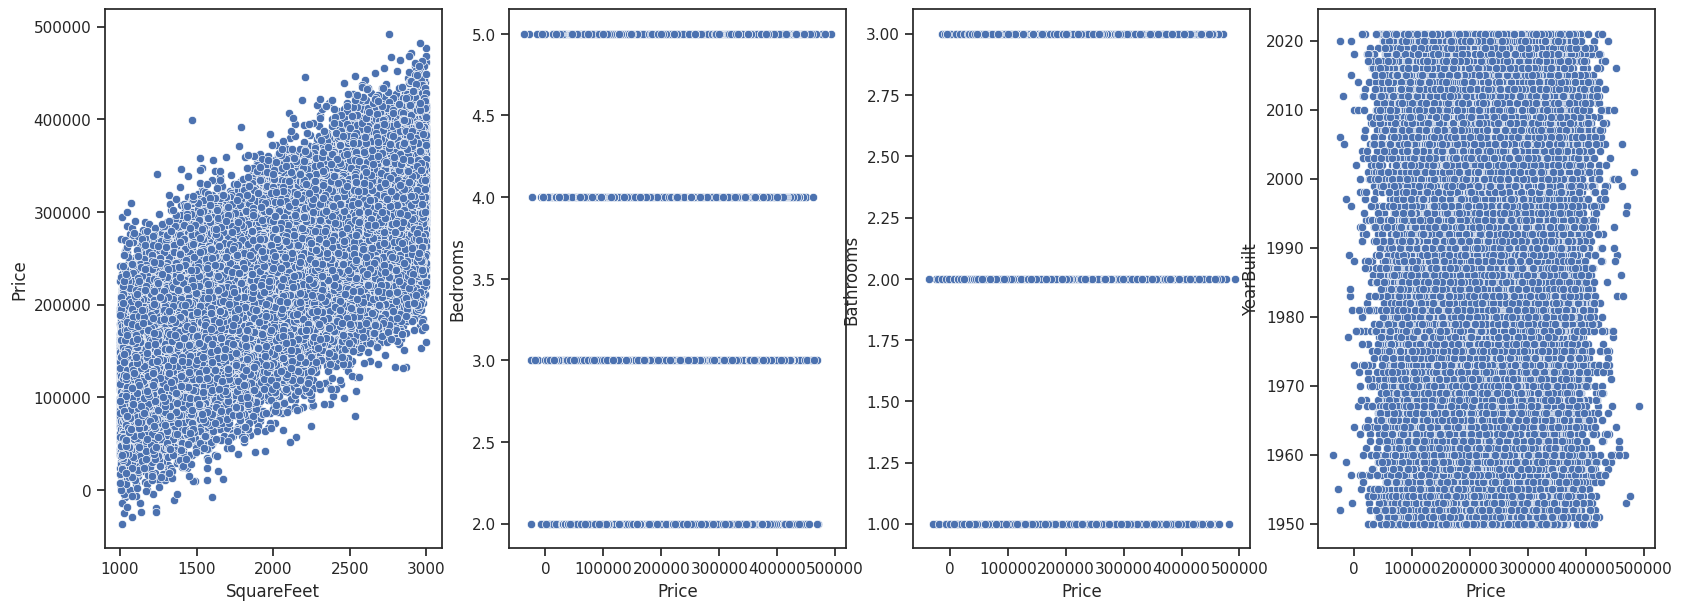

In [193]:
# Visualizar relaciones entre el precio y algunas características relevantes
cols = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']
c = 0

fig, axs = plt.subplots(ncols=len(cols), figsize=(20, 7))

for i in cols:
  if i=='SquareFeet':
      sns.scatterplot(data=dataload, x = dataload[i], y = dataload['Price'], ax=axs[c])
      c += 1
  else:
    sns.scatterplot(data=dataload, x=dataload['Price'], y=dataload[i], ax=axs[c])
    c += 1

<ipython-input-198-383505cbfc1e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

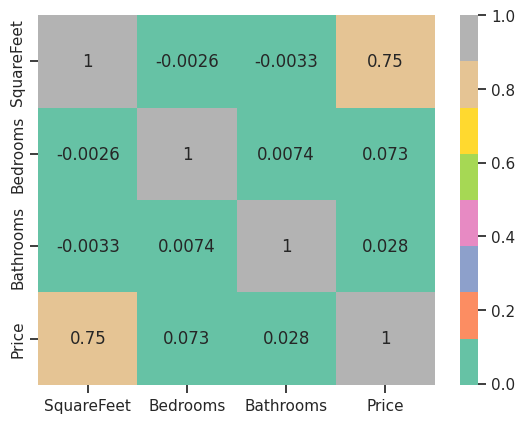

In [198]:
sns.heatmap(dataload.corr(),annot = True, cmap = "Set2")

In [222]:
dataload = dataload.drop(["YearBuilt"], axis=1) #Es el valor con menor contribución en el precio así que lo eliminamos

In [200]:
fig = px.pie(dataload, values = "Price", names = "Neighborhood", title = "Price Vs Neighborhood")
fig.show()

In [201]:
dataload["Neighborhood"] = dataload["Neighborhood"].map({"Rural":0,"Suburb":1,"Urban":2})

In [202]:
dataload.describe(include='all')

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,0.998540,224827.325151
std,575.513241,1.116326,0.815851,0.815838,76141.842966
min,1000.000000,2.000000,1.000000,0.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,0.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2.000000,279373.630052
max,2999.000000,5.000000,3.000000,2.000000,492195.259972


In [203]:
houses_num = dataload.copy()

In [204]:
houses_num.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,Price
0,2126,4,1,0,215355.283618
1,2459,3,2,0,195014.221626
2,1860,2,1,1,306891.012076
3,2294,2,1,2,206786.787153
4,2130,5,2,1,272436.239065
5,2095,2,3,1,198208.803907
6,2724,2,1,1,343429.319110
7,2044,4,3,0,184992.321268
8,2638,4,3,2,377998.588152
9,1121,5,2,2,95961.926014


In [205]:
X = houses_num.drop('Price', axis=1)
y = houses_num['Price']

In [211]:
encoder = LabelEncoder()

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [213]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [214]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [215]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mae"])

In [216]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1172/1172 [==============================] - 2s 1ms/step - loss: 55602786304.0000 - mae: 223280.3906
Epoch 2/100
1172/1172 [==============================] - 1s 1ms/step - loss: 47273136128.0000 - mae: 204077.2812
Epoch 3/100
1172/1172 [==============================] - 1s 1ms/step - loss: 29341124608.0000 - mae: 155111.1719
Epoch 4/100
1172/1172 [==============================] - 1s 1ms/step - loss: 12739041280.0000 - mae: 94197.4766
Epoch 5/100
1172/1172 [==============================] - 2s 1ms/step - loss: 6305790976.0000 - mae: 63826.0234
Epoch 6/100
1172/1172 [==============================] - 2s 2ms/step - loss: 5377918976.0000 - mae: 58782.6875
Epoch 7/100
1172/1172 [==============================] - 2s 1ms/step - loss: 4914195968.0000 - mae: 56151.4922
Epoch 8/100
1172/1172 [==============================] - 1s 1ms/step - loss: 4426603008.0000 - mae: 53248.8242
Epoch 9/100
1172/1172 [==============================] - 1s 1ms/step - loss: 3961121280.0000 - mae: 50345

In [217]:
train_pred = model.predict(X_train)
print("MAE on Training Set:", mean_absolute_error(y_train, train_pred))

1172/1172 [==============================] - 1s 918us/step
MAE on Training Set: 39966.36858738382


In [218]:
test_pred = model.predict(X_test)
print("MAE on Test Set:", mean_absolute_error(y_test, test_pred))

391/391 [==============================] - 0s 964us/step
MAE on Test Set: 39712.82936288882


In [219]:
# Create DataFrames for training and testing datasets
train_data = pd.DataFrame({'Actual': y_train.ravel(), 'Predicted': train_pred.ravel(), 'Dataset': 'Training'})
test_data = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': test_pred.ravel(), 'Dataset': 'Testing'})

# Concatenate both DataFrames
combined_data = pd.concat([train_data, test_data], ignore_index=True)

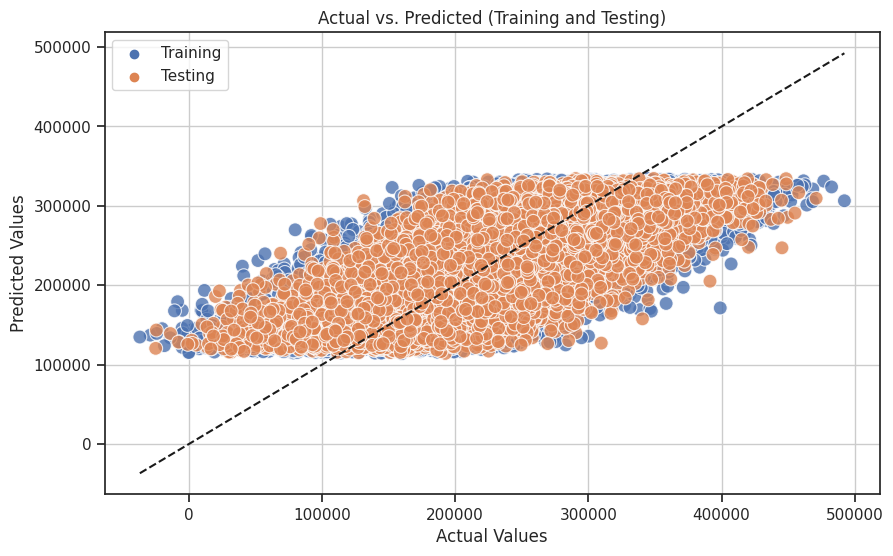

In [220]:
# Plot the results using Seaborn
sns.set(style='ticks')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', hue='Dataset', data=combined_data, s=100, alpha=0.8)
plt.plot([min(y.min(), train_pred.min()) - 1, max(y.max(), train_pred.max()) + 1],
         [min(y.min(), train_pred.min()) - 1, max(y.max(), train_pred.max()) + 1], 'k--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Training and Testing)')
plt.legend()
plt.grid(True)
plt.show()